In [2]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

core_pth = Path('/home/agrawalp2/prepositions'); assert core_pth.exists()
stupd_pth = Path('/mnt/dataset/agrawalp2/stupd_dataset'); assert stupd_pth.exists()

In [3]:
subjs = {}
objs = {}

subjs_sup = {}
objs_sup = {}

for i in (stupd_pth/'annotations').iterdir():
    if i.suffix!='.csv': continue
    df = pd.read_csv(i).fillna('')
    for _, row in df.iterrows():
        subjs[row['subject_category']] =  1 if row['subject_category'] not in subjs else subjs[row['subject_category']]+ 1
        objs[row['object_category']] =  1 if row['object_category'] not in objs else objs[row['object_category']]+1
        subjs_sup[row['subject_supercategory']] = 1 if row['subject_supercategory'] not in subjs_sup else subjs_sup[row['subject_supercategory']]+1
        objs_sup[row['object_supercategory']] = 1 if row['object_supercategory'] not in objs_sup else objs_sup[row['object_supercategory']]+ 1
subjs.pop('', None)
objs.pop('', None)
subjs_sup.pop('', None)
objs_sup.pop('', None)

22583

<BarContainer object of 29 artists>

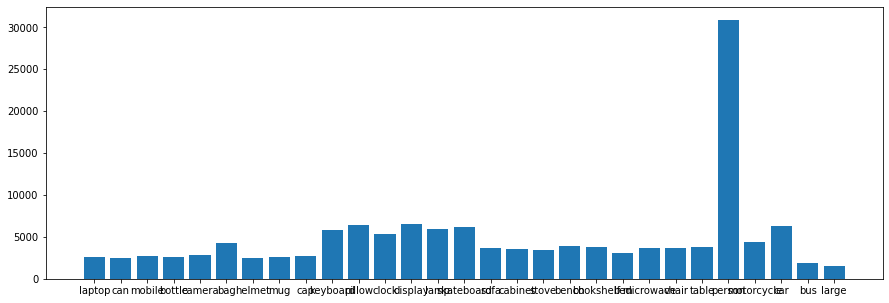

In [44]:
# subjs.pop('', None)
plt.figure(figsize = (15,5))
plt.bar(subjs.keys(), subjs.values())s

In [40]:
subjs

{'laptop': 2653,
 'can': 2502,
 'mobile': 2661,
 'bottle': 2627,
 'camera': 2823,
 'bag': 4216,
 'helmet': 2518,
 'mug': 2652,
 'cap': 2751,
 'keyboard': 5865,
 'pillow': 6438,
 'clock': 5362,
 'display': 6585,
 'lamp': 5927,
 'skateboard': 6238,
 'sofa': 3685,
 'cabinet': 3510,
 'stove': 3454,
 'bench': 3923,
 'bookshelf': 3740,
 'bed': 3078,
 'microwave': 3714,
 'chair': 3679,
 'table': 3833,
 'person': 30887,
 'motorcycle': 4438,
 'car': 6349,
 'bus': 1937,
 'large': 1505}

In [36]:
subjs_sup

{'small objects': 61818,
 'furniture': 32616,
 'person': 30887,
 'vehicles': 12724,
 'grounded': 1505}

<BarContainer object of 34 artists>

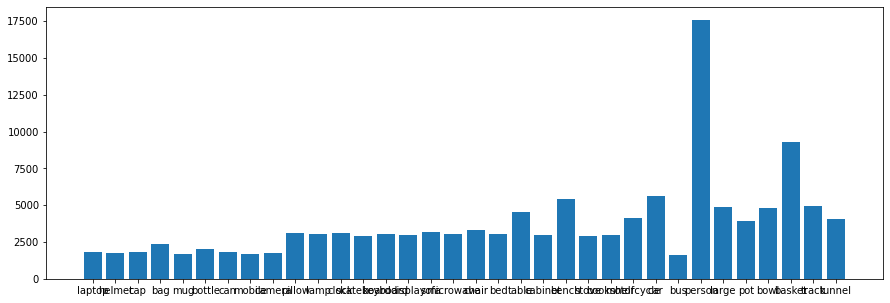

In [45]:
plt.figure(figsize = (15,5))
plt.bar(objs.keys(), objs.values())

In [38]:
objs_sup

{'small objects': 34878,
 'furniture': 31361,
 'vehicles': 11411,
 'person': 17580,
 'grounded': 4905,
 'container': 17994,
 'track': 4975,
 'tunnel': 4089}

In [48]:
total = {}
total_sup = {}

for i in subjs: total[i] = subjs[i]+objs[i]
for i in subjs_sup: total_sup[i] = subjs_sup[i] + objs_sup[i]

<BarContainer object of 29 artists>

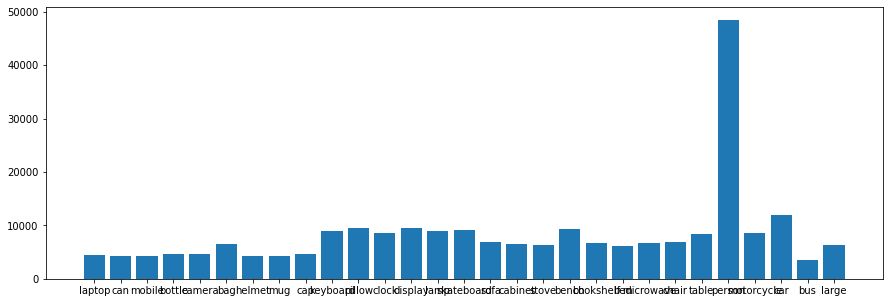

In [49]:
plt.figure(figsize = (15,5))
plt.bar(total.keys(), total.values())

<BarContainer object of 5 artists>

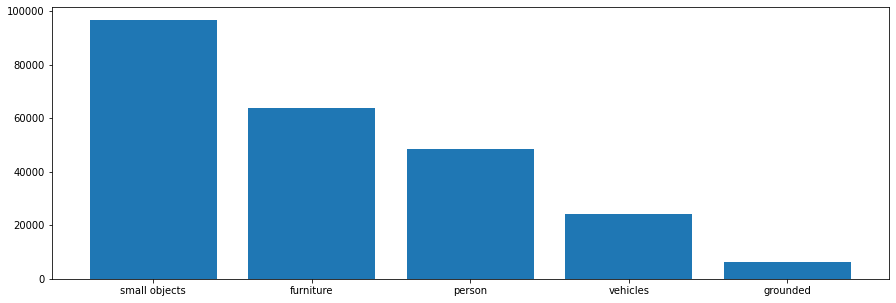

In [50]:
plt.figure(figsize = (15,5))
plt.bar(total_sup.keys(), total_sup.values())

In [51]:
total_sup

{'small objects': 96696,
 'furniture': 63977,
 'person': 48467,
 'vehicles': 24135,
 'grounded': 6410}

<ipython-input-16-887e39df9746>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90, ha='left')


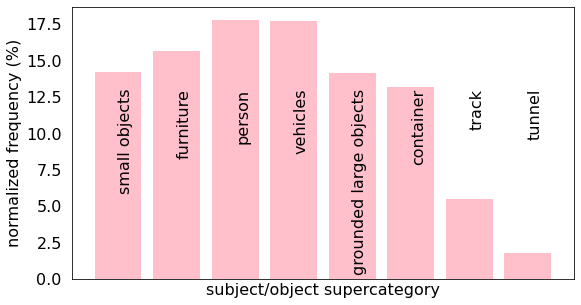

In [16]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

normalized = {'small objects': 96696/15,
             'furniture': 63977/9,
             'person': 48467/6,
             'vehicles': 24135/3,
             'grounded large objects': 6410,
               'container': 17994/3,
             'track': 4975/2,
            'tunnel': 4089/5, 
            }

sum_normal = sum(normalized.values())
for i in normalized: normalized[i]*= 100/sum_normal

fig, ax = plt.subplots()
labels = list(normalized.keys())

fig.set_size_inches(9, 5)

ax.bar(normalized.keys(), normalized.values(), color = 'pink')
ax.set_xticklabels(labels, rotation=90, ha='left')

ax.tick_params(axis="y",direction="in", pad=10, left = False)
ax.tick_params(axis="x",direction="in", pad=-190, bottom = False, which = 'major')
ax.set_ylabel('normalized frequency (%)') 
ax.set_xlabel('subject/object supercategory')
# ax.pie(normalized.values(), labels=normalized.keys())

fig.savefig(core_pth/'experiments/supercategory_normalized_distribution.png')